# Итоговая работа по курсу “Feature engineering и предобработка данных”

### Задание к итоговой работе:
1. Загрузить файл data_breast.csv. 
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение). 
3. Выбрать стратегию для работы с пропущенными значениями.
4. Рассчитать и визуализировать корреляционную матрицу для переменных.
5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, ...).
6. С помощью статистических методов проверить взаимосвязи между переменными.
7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при  классификации?
8. Рассчитать Feature Selection для выбранных переменных.
9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.
10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall.
11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import os
import statistics
from scipy import stats as sts

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, roc_curve, f1_score, precision_score, recall_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

### 1. Загрузить исходные данные data_breast.csv

In [2]:
data = pd.read_csv("data_breast.csv")
data.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
# Размер дата-фрейма 
data.shape

(569, 33)

In [5]:
# Колонки с пустыми значениями
data.columns[data.isna().any()].tolist()

['Unnamed: 32']

In [6]:
data[data.columns[data.isna().any()]].dtypes

Unnamed: 32    float64
dtype: object

### Эксплоративный анализ данных

В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious).

**Attribute Information:**

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

1. a) radius (mean of distances from center to points on the perimeter)
2. b) texture (standard deviation of gray-scale values)
3. c) perimeter
4. d) area
5. e) smoothness (local variation in radius lengths)
6. f) compactness (perimeter ^ 2 / area - 1.0)
7. g) concavity (severity of concave portions of the contour)
8. h) concave points (number of concave portions of the contour)
9. i) symmetry
10. j) fractal dimension ("coastline approximation" - 1)

In [7]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

В датасете отсутствуют нулевые значения переменных. Размер датасета составляет: 569 строк и 33 колонки. Имеется категориальная переменная ***'diagnosis'*** (показатели диагноза: 357-доброкачественные, 212-злокачественные).

### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [8]:
# Основные статистики для переменных
stat_data = data.drop('id', axis=1)
stat_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
# Мода
stat_data.mode()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,B,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,...,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427,NaN
1,NaN,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,...,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN,NaN
2,NaN,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,...,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN,NaN
3,NaN,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,...,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN,NaN
4,NaN,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,...,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN,NaN
5,NaN,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,489.5,0.1312,NaN,NaN,NaN,0.3196,NaN,NaN
6,NaN,NaN,18.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,546.7,0.1347,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,19.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,547.4,0.1401,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,624.1,0.1415,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,698.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Выбрать стратегию для работы с пропущенными значениями.

**В анализируемом датасете отсутствуют нулевые значения. Для дальнейшей работы с данными планируется:**
1. Удалить переменную ***'Unnamed: 32'*** получен в результате ошибки в исходных данных (была поставлена лишняя запятая в строке заголовков).
2. Удалить переменную ***'id'***. Все значения данной переменной являются исключительно идентификаторами пациентов, при этом никакой информативной составляющей они не несут.
3. Переменная ***'diagnosis'*** является категориальной. В дальнейшей работе планируется использовать ее как ***target*** для предиктивных моделей. Текстовые значения этой переменной предполагается оставить без изменений, так как при последующей обработке датасета планируется использовать метод get_dummies.

### 4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [10]:
# Удаляем столбец 'Unnamed: 32'. Преобразуем категориальные переменные с помощью метода get_dummies. 
# Построение корреляционной матрицы
df_breast = stat_data.drop('Unnamed: 32', axis=1)
df_breast = pd.get_dummies(df_breast, drop_first=True)
df_breast.rename(columns={'diagnosis_M':'diagnosis'},inplace=True)
corr = df_breast.corr()

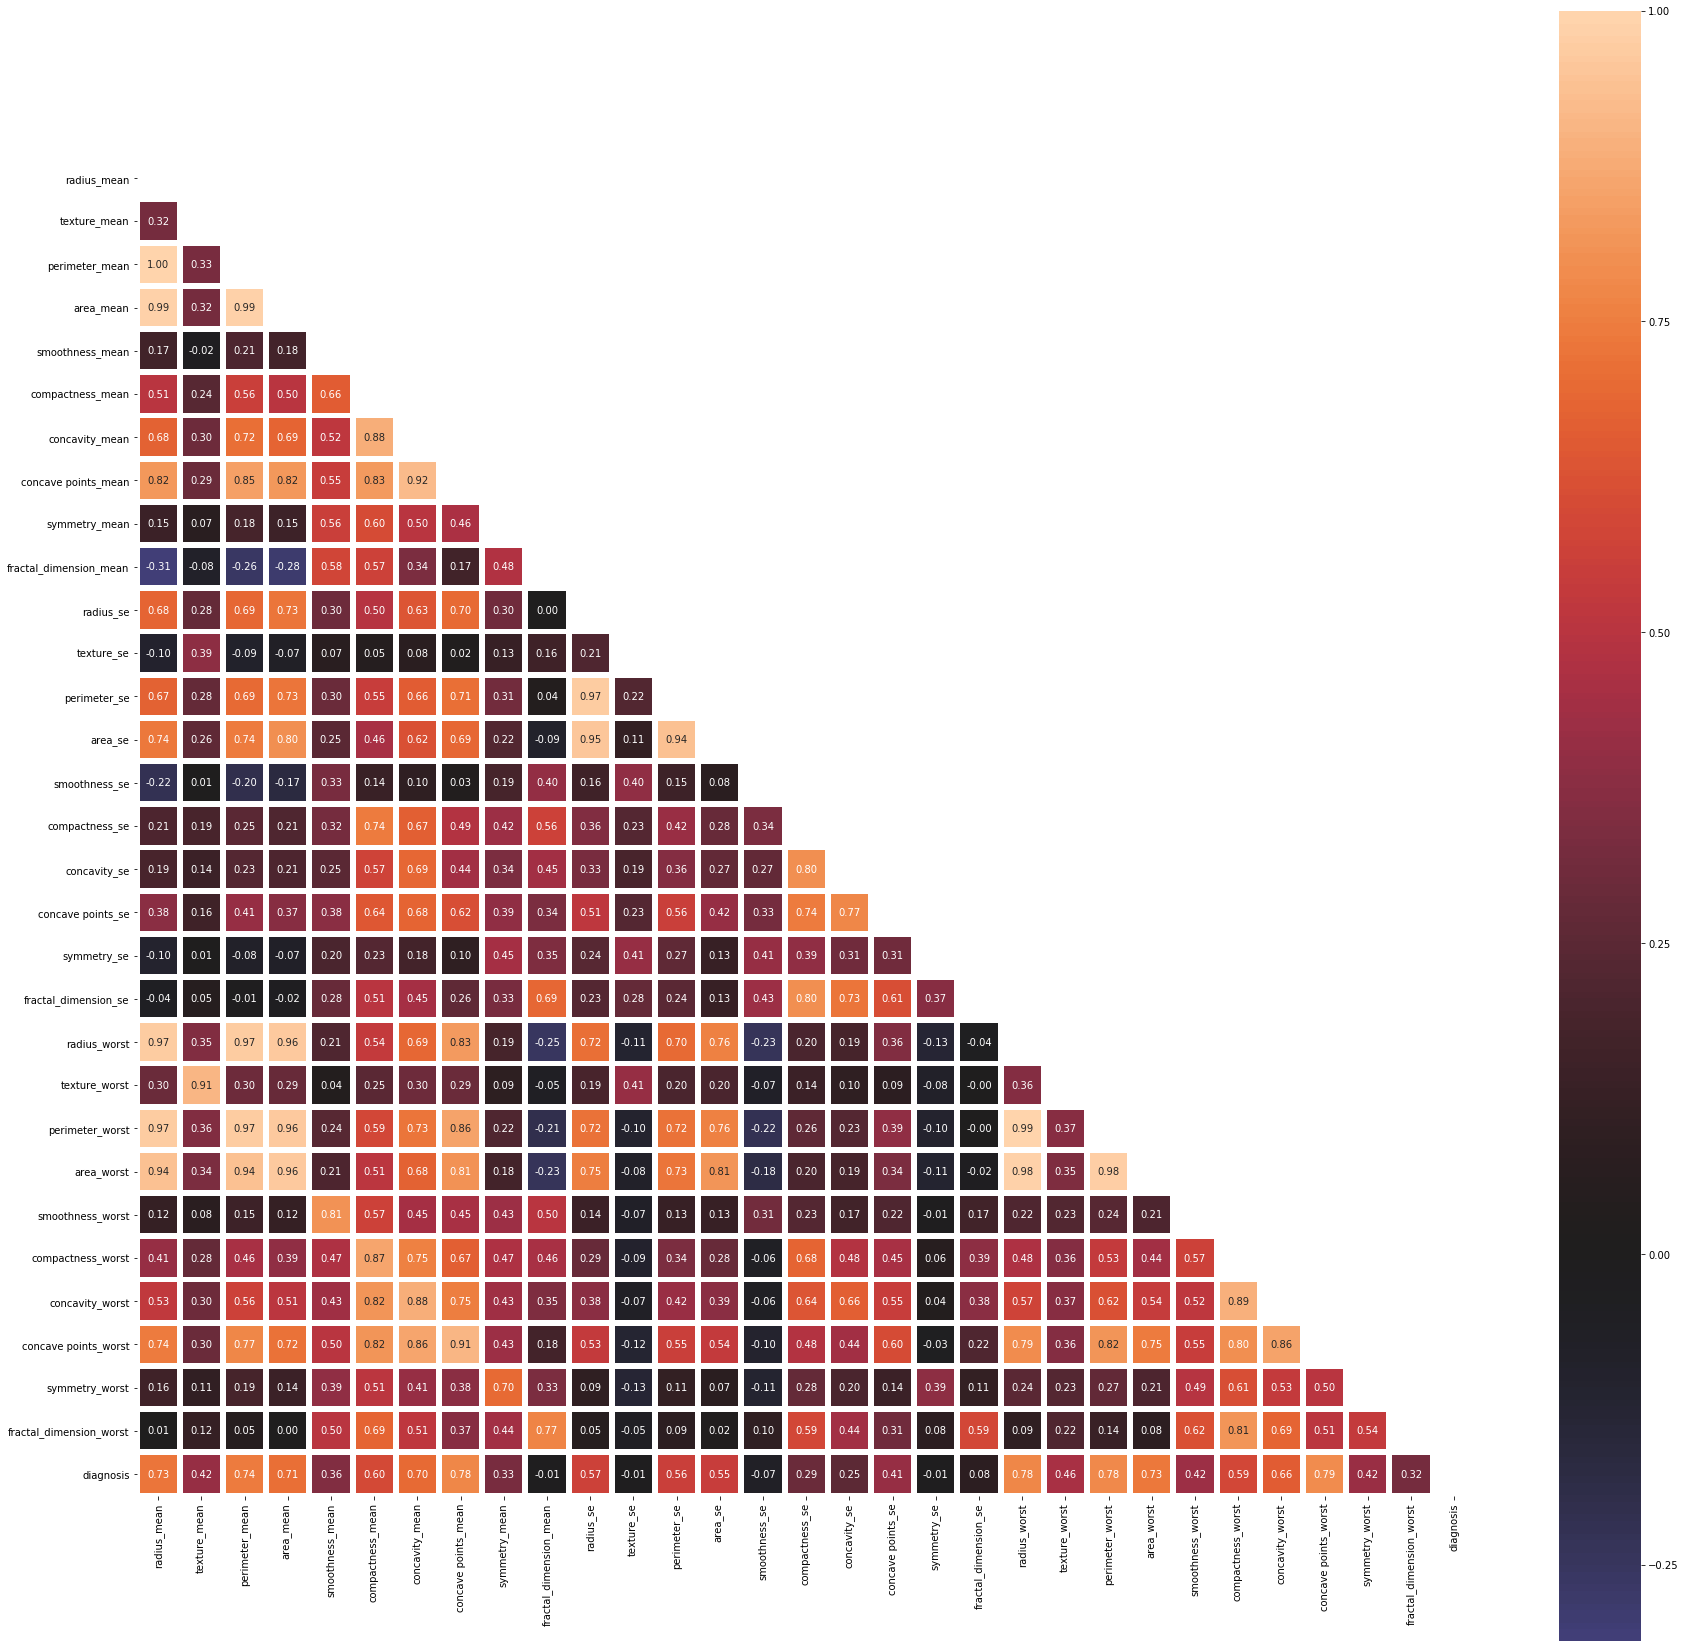

In [11]:
# Визуализация корреляционной матрицы
%config InlineBackend.figure_format = 'png'
plt.figure(figsize=(30,30))
# Создание маски для скрытия верхнего треугольника матрицы корреляции
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f', square=True, linewidths=5);

### 5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

**Визуализация взаимосвязей между переменными**

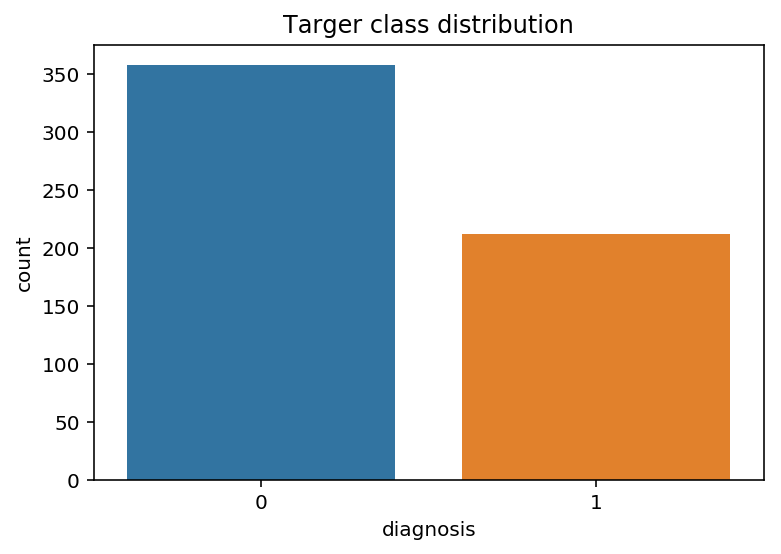

In [12]:
# Распределение параметра Diagnosis
%config InlineBackend.figure_format = 'retina'
ax = plt.axes()
sns.countplot(x='diagnosis', data=df_breast, ax=ax);
ax.set_title('Targer class distribution')
plt.show()

**Распределение признаков в зависимости от значения target 0 или 1** (targer является переменная diagnosis B=0, M=1)

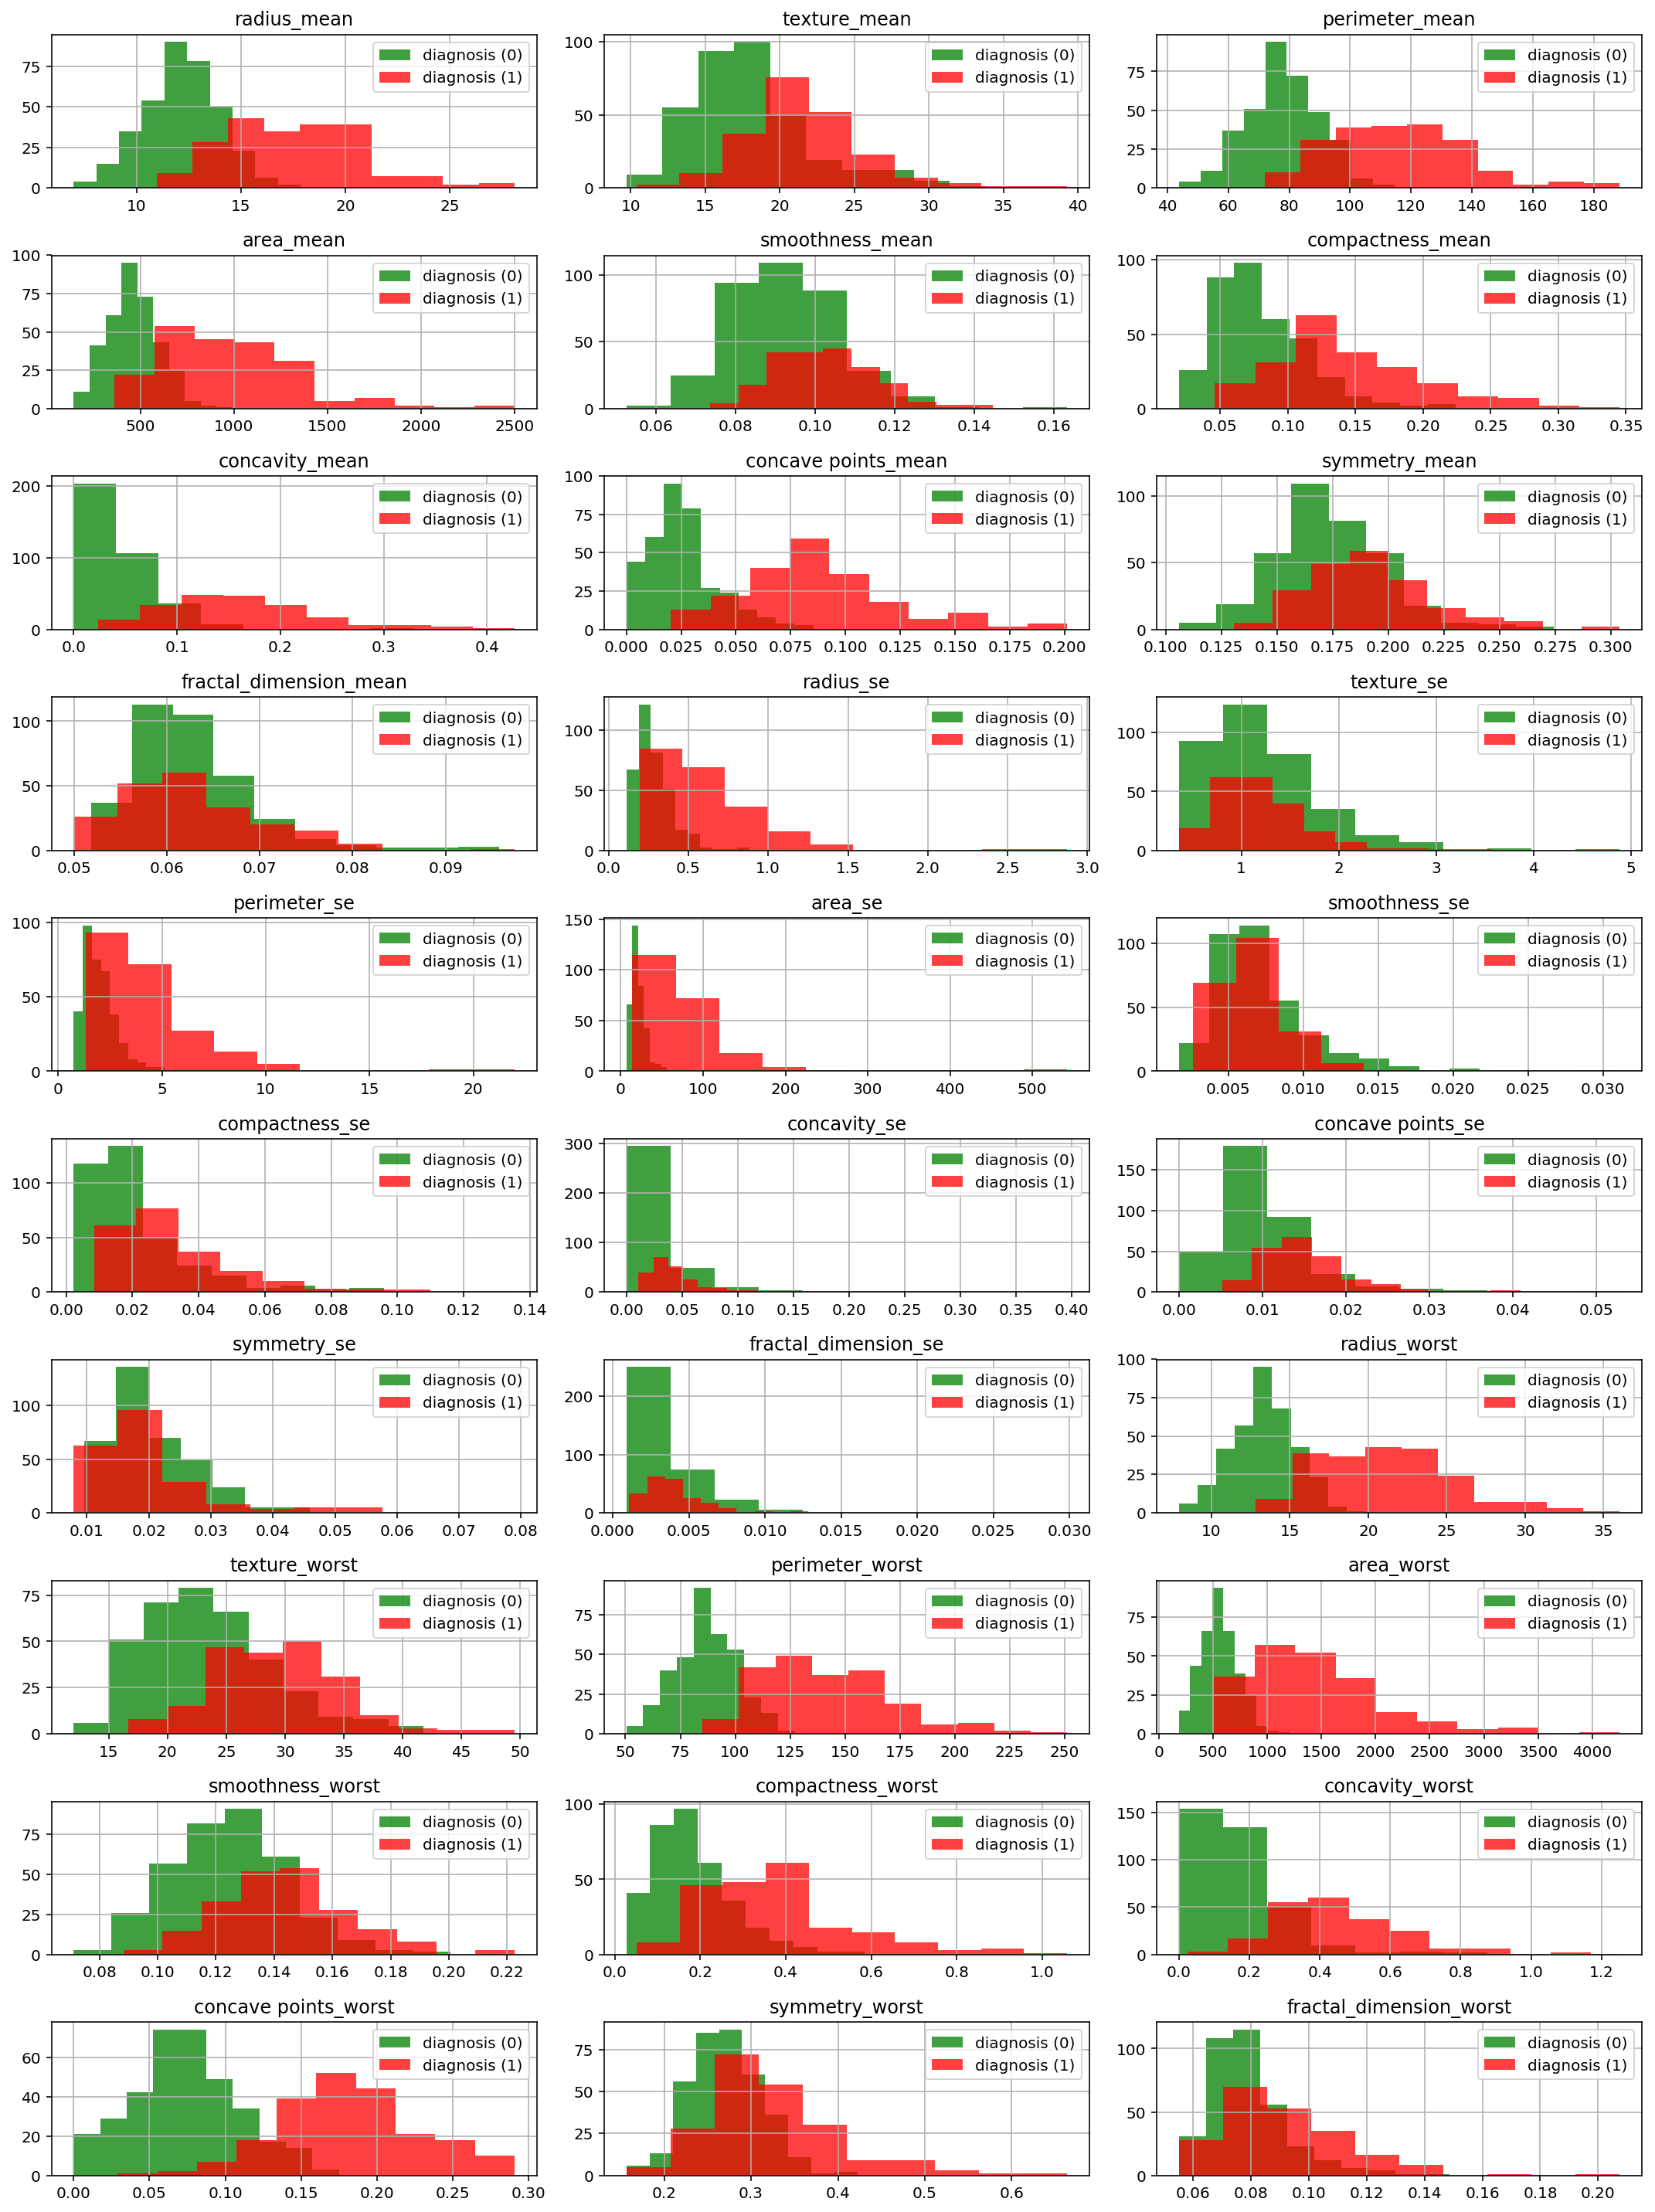

In [13]:
# Diagnosis совместно 1 и 0.
fig, ax = plt.subplots(10, 3, figsize=(15,20))
for col, axis in zip(df_breast.select_dtypes(include=[np.number]).columns[0:],[i for i in ax.flat]):
    df_breast.loc[df_breast['diagnosis']==0, df_breast.columns!='diagnosis'].hist(column=col, ax=axis, alpha=0.75, color='green', label='diagnosis (0)')
    df_breast.loc[df_breast['diagnosis']==1, df_breast.columns!='diagnosis'].hist(column=col, ax=axis, alpha=0.75, color='red', label='diagnosis (1)')
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()

**Признаки имеют следующие виды распределений:** нормальное, логнормальное, экспоненциальное

### 6. С помощью статистических методов проверить взаимосвязи между переменными.

**Двухвыборочный t-критерий для независимых выборок по всем переменным**

Для проверки взаимосвязей между переменными будем использовать t-критерий Стьюдента. Использование данного критерия представляется возможным в связи с тем, что практически все переменные имеют нормальное, логнормальное и экспоненциальное распределение, а также отсутсвуют признаки выбросов (к которым данный критерий очень чувствителен).

Проведем оценку и сравнительный анализ всех переменных из групп ***mean*** и ***worst***. Так как визуальная оценка распределения признаков всех переменных показывает, что наибольшие отличия распределения признаков в зависимости от значения ***target*** (1 или 0) наблюдаются именно в этих группах.

In [14]:
# Расчет t-критерия для всех переменных группы mean и worst 
#Radius
# значения для mean
radius_mean_0 = df_breast[df_breast['diagnosis']==0]['radius_mean']
radius_mean_1 = df_breast[df_breast['diagnosis']==1]['radius_mean']
# значения для worst
radius_worst_0 = df_breast[df_breast['diagnosis']==0]['radius_worst']
radius_worst_1 = df_breast[df_breast['diagnosis']==1]['radius_worst']
# расчет двухвыборочного t-критерия для двух независимых выборок
ttest_radius_mean = sts.ttest_ind(radius_mean_0, radius_mean_1)
ttest_radius_worst = sts.ttest_ind(radius_worst_0, radius_worst_1)

#Texture
# значения для mean
texture_mean_0 = df_breast[df_breast['diagnosis']==0]['texture_mean']
texture_mean_1 = df_breast[df_breast['diagnosis']==1]['texture_mean']
# значения для worst
texture_worst_0 = df_breast[df_breast['diagnosis']==0]['texture_worst']
texture_worst_1 = df_breast[df_breast['diagnosis']==1]['texture_worst']

ttest_texture_mean = sts.ttest_ind(texture_mean_0, texture_mean_1)
ttest_texture_worst = sts.ttest_ind(texture_worst_0, texture_worst_1)

#Perimeter
# значения для mean
perimeter_mean_0 = df_breast[df_breast['diagnosis']==0]['perimeter_mean']
perimeter_mean_1 = df_breast[df_breast['diagnosis']==1]['perimeter_mean']
# значения для worst
perimeter_worst_0 = df_breast[df_breast['diagnosis']==0]['perimeter_worst']
perimeter_worst_1 = df_breast[df_breast['diagnosis']==1]['perimeter_worst']

ttest_perimeter_mean = sts.ttest_ind(perimeter_mean_0, perimeter_mean_1)
ttest_perimeter_worst = sts.ttest_ind(perimeter_worst_0, perimeter_worst_1)

#Area
# значения для mean
area_mean_0 = df_breast[df_breast['diagnosis']==0]['area_mean']
area_mean_1 = df_breast[df_breast['diagnosis']==1]['area_mean']
# значения для worst
area_worst_0 = df_breast[df_breast['diagnosis']==0]['area_worst']
area_worst_1 = df_breast[df_breast['diagnosis']==1]['area_worst']

ttest_area_mean = sts.ttest_ind(area_mean_0, area_mean_1)
ttest_area_worst = sts.ttest_ind(area_worst_0, area_worst_1)

#Smoothness
# значения для mean
smoothness_mean_0 = df_breast[df_breast['diagnosis']==0]['smoothness_mean']
smoothness_mean_1 = df_breast[df_breast['diagnosis']==1]['smoothness_mean']
# значения для worst
smoothness_worst_0 = df_breast[df_breast['diagnosis']==0]['smoothness_worst']
smoothness_worst_1 = df_breast[df_breast['diagnosis']==1]['smoothness_worst']

ttest_smoothness_mean = sts.ttest_ind(smoothness_mean_0, smoothness_mean_1)
ttest_smoothness_worst = sts.ttest_ind(smoothness_worst_0, smoothness_worst_1)

#Compactness
# значения для mean
compactness_mean_0 = df_breast[df_breast['diagnosis']==0]['compactness_mean']
compactness_mean_1 = df_breast[df_breast['diagnosis']==1]['compactness_mean']
# значения для worst
compactness_worst_0 = df_breast[df_breast['diagnosis']==0]['compactness_worst']
compactness_worst_1 = df_breast[df_breast['diagnosis']==1]['compactness_worst']

ttest_compactness_mean = sts.ttest_ind(compactness_mean_0, compactness_mean_1)
ttest_compactness_worst = sts.ttest_ind(compactness_worst_0, compactness_worst_1)

#Concavity
# значения для mean
concavity_mean_0 = df_breast[df_breast['diagnosis']==0]['concavity_mean']
concavity_mean_1 = df_breast[df_breast['diagnosis']==1]['concavity_mean']
# значения для worst
concavity_worst_0 = df_breast[df_breast['diagnosis']==0]['concavity_worst']
concavity_worst_1 = df_breast[df_breast['diagnosis']==1]['concavity_worst']

ttest_concavity_mean = sts.ttest_ind(concavity_mean_0, concavity_mean_1)
ttest_concavity_worst = sts.ttest_ind(concavity_worst_0, concavity_worst_1)

#Concave_points
# значения для mean
concave_points_mean_0 = df_breast[df_breast['diagnosis']==0]['concave points_mean']
concave_points_mean_1 = df_breast[df_breast['diagnosis']==1]['concave points_mean']
# значения для worst
concave_points_worst_0 = df_breast[df_breast['diagnosis']==0]['concave points_worst']
concave_points_worst_1 = df_breast[df_breast['diagnosis']==1]['concave points_worst']

ttest_concave_points_mean = sts.ttest_ind(concave_points_mean_0, concave_points_mean_1)
ttest_concave_points_worst = sts.ttest_ind(concave_points_worst_0, concave_points_worst_1)

#Symmetry
# значения для mean
symmetry_mean_0 = df_breast[df_breast['diagnosis']==0]['symmetry_mean']
symmetry_mean_1 = df_breast[df_breast['diagnosis']==1]['symmetry_mean']
# значения для worst
symmetry_worst_0 = df_breast[df_breast['diagnosis']==0]['symmetry_worst']
symmetry_worst_1 = df_breast[df_breast['diagnosis']==1]['symmetry_worst']

ttest_symmetry_mean = sts.ttest_ind(symmetry_mean_0, symmetry_mean_1)
ttest_symmetry_worst = sts.ttest_ind(symmetry_worst_0, symmetry_worst_1)

#Fractal_dimension
# значения для mean
fractal_dimension_mean_0 = df_breast[df_breast['diagnosis']==0]['fractal_dimension_mean']
fractal_dimension_mean_1 = df_breast[df_breast['diagnosis']==1]['fractal_dimension_mean']
# значения для worst
fractal_dimension_worst_0 = df_breast[df_breast['diagnosis']==0]['fractal_dimension_worst']
fractal_dimension_worst_1 = df_breast[df_breast['diagnosis']==1]['fractal_dimension_worst']

ttest_fractal_dimension_mean = sts.ttest_ind(fractal_dimension_mean_0, fractal_dimension_mean_1)
ttest_fractal_dimension_worst = sts.ttest_ind(fractal_dimension_worst_0, fractal_dimension_worst_1)

# Печать сравнительных результатов t-test
print("Ttest radius_mean: ", ttest_radius_mean)
print("Ttest radius_worst: ", ttest_radius_worst)
print("")
print("Ttest texture_mean: ", ttest_texture_mean)
print("Ttest texture_worst: ", ttest_texture_worst)
print("")
print("Ttest perimeter_mean: ", ttest_perimeter_mean)
print("Ttest perimeter_worst: ", ttest_perimeter_worst)
print("")
print("Ttest area_mean: ", ttest_area_mean)
print("Ttest area_worst: ", ttest_area_worst)
print("")
print("Ttest smoothness_mean: ", ttest_smoothness_mean)
print("Ttest smoothness_worst: ", ttest_smoothness_worst)
print("")
print("Ttest compactness_mean: ", ttest_compactness_mean)
print("Ttest compactness_worst: ", ttest_compactness_worst)
print("")
print("Ttest concavity_mean: ", ttest_concavity_mean)
print("Ttest concavity_worst: ", ttest_concavity_worst)
print("")
print("Ttest concave_points_mean: ", ttest_concave_points_mean)
print("Ttest concave_points_worst: ", ttest_concave_points_worst)
print("")
print("Ttest symmetry_mean: ", ttest_symmetry_mean)
print("Ttest symmetry_worst: ", ttest_symmetry_worst)
print("")
print("Ttest fractal_dimension_mean: ", ttest_fractal_dimension_mean)
print("Ttest fractal_dimension_worst: ", ttest_fractal_dimension_worst)

Ttest radius_mean:  Ttest_indResult(statistic=-25.435821610057054, pvalue=8.465940572262422e-96)
Ttest radius_worst:  Ttest_indResult(statistic=-29.33908156342075, pvalue=8.482291921684414e-116)

Ttest texture_mean:  Ttest_indResult(statistic=-10.86720108146434, pvalue=4.0586360478980736e-25)
Ttest texture_worst:  Ttest_indResult(statistic=-12.23098134599393, pvalue=1.0780574879494241e-30)

Ttest perimeter_mean:  Ttest_indResult(statistic=-26.405212979192665, pvalue=8.43625103617473e-101)
Ttest perimeter_worst:  Ttest_indResult(statistic=-29.965717392710303, pvalue=5.771397139668621e-119)

Ttest area_mean:  Ttest_indResult(statistic=-23.938687235690992, pvalue=4.734564310307344e-88)
Ttest area_worst:  Ttest_indResult(statistic=-25.721590260589004, pvalue=2.828847704286693e-97)

Ttest smoothness_mean:  Ttest_indResult(statistic=-9.146098808149038, pvalue=1.0518503592032013e-18)
Ttest smoothness_worst:  Ttest_indResult(statistic=-11.066746606769504, pvalue=6.575143633984769e-26)

Ttest c

###### Комментарий 
Отличия в распределении выборок (с таргетом 1 и 0) наблюдаются практически во всех переменных. За исключением двух независимых выборок (fractal_dimension_mean, со значением ***target*** 1 и 0, где значение p-value=0.75) все остальные выборки имеют значение p-value намного меньше 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между выборками по всеми переменными в зависимости от значения ***target***.

Следует также отметить, что в большинстве переменных группы ***worst*** значение p-value гораздо меньше, чем в их аналогах в группе ***mean***. Данное обстоятельство, предположительно, указывает на то, что статистическое различия между аналогичными выборками в группе ***worst*** гораздо сильнее, чем в группе ***mean***.

### 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при  классификации?

Для дальнейшей работы выберем стратегию сокращения размерности датасета. На основании результатов оценки по двухвыюорочному t-критерию, оставляем для построения предиктивной модели 20 переменных группы ***mean*** и ***worst*** (radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal_dimension), таргетом будет выбрана переменная diagnosis. Ниже рассмотрим возможность сокращения размерности датасета до 10 переменных (все переменные по группе ***worst***) и таргета.

#### Выбор фич
#### Сокращение размерности дата-сета.

In [15]:
df_breast['diagnosis'] = pd.to_numeric(df_breast['diagnosis'])

In [16]:
# Создание датасетов уменьшеной размерности (группа переменных mean и worst)
# Датасет уменьшенной размерности с переменными из групп mean и worst
df_mean_worst = df_breast[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

# Датасет уменьшенной размерности с переменными только из группы worst
df_worst = df_breast[['diagnosis','radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

### 8. Рассчитать Feature Selection для выбранных переменных.

#### Проверим результаты общей выборки и двух  выборок с уменьшеной размерностью на примере модели линейной регрессии.

#### Разбиение данных на train/test

In [17]:
# Определение target, feature. Распределение данных на тренировочную и тестовую выборки.
# Для общей выборки
y=df_breast['diagnosis'].copy()
X=df_breast.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Для выборки уменьшенной размерности (содержащей только переменные из групп mean и worst)
y1=df_mean_worst['diagnosis'].copy()
X1=df_mean_worst.drop('diagnosis', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Для выборки уменьшенной размерности (содержащей только переменные из группы worst)
y2=df_worst['diagnosis'].copy()
X2=df_worst.drop('diagnosis', axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

#### Стандартизация значений переменных

In [18]:
# Для общей выборки
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Для выборки уменьшенной размерности (содержащей только переменные из групп mean и worst)
scaler = StandardScaler()
scaler.fit_transform(X1_train)
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

# Для выборки уменьшенной размерности (содержащей только переменные из группы worst)
scaler = StandardScaler()
scaler.fit_transform(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

#### Модель LinearRegression (линейная регресия)

In [19]:
# Модель линейной регрессии для общей выборки
df_linreg = LinearRegression() # выбираем модель обучения (линейная регрессия)
df_linreg.fit(X_train, y_train) # обучаем модель

y_pred_linreg_train = df_linreg.predict(X_train) # предсказание для train
y_pred_linreg_test = df_linreg.predict(X_test) # предсказание для test

df_mse_train = mean_squared_error(y_train, y_pred_linreg_train) # среднеквадратическая ошибка для train
df_mse_test = mean_squared_error(y_test, y_pred_linreg_test) # среднеквадратическая ошибка для test
df_rmse_train = np.sqrt(df_mse_train) # корень среднеквадратической ошибки для train
df_rmse_test = np.sqrt(df_mse_test) # корень среднеквадратической ошибки для test

df_linreg_roc_auc_train = np.round(roc_auc_score(y_train, y_pred_linreg_train), 2) # показатель roc_auc для train
df_linreg_roc_auc_test = np.round(roc_auc_score(y_test, y_pred_linreg_test), 2) # показатель roc_auc для test

print("Train: ", df_rmse_train)
print("Test: ", df_rmse_test)
print("")
print("Train: ", df_linreg_roc_auc_train)
print("Test: ", df_linreg_roc_auc_test)

Train:  0.22649713723595086
Test:  0.2593911497981993

Train:  1.0
Test:  0.99


In [20]:
# Модель линейной регрессии для выборки уменьшенной размерности (содержащей только переменные из групп mean и worst)
df_mean_worst_linreg = LinearRegression() # выбираем модель обучения (линейная регрессия)
df_mean_worst_linreg.fit(X1_train, y1_train) # обучаем модель

y1_pred_linreg_train = df_mean_worst_linreg.predict(X1_train) # предсказание для train
y1_pred_linreg_test = df_mean_worst_linreg.predict(X1_test) # предсказание для test

df_mean_worst_mse_train = mean_squared_error(y1_train, y1_pred_linreg_train) # среднеквадратическая ошибка для train
df_mean_worst_mse_test = mean_squared_error(y1_test, y1_pred_linreg_test) # среднеквадратическая ошибка для test
df_mean_worst_rmse_train = np.sqrt(df_mean_worst_mse_train) # корень среднеквадратической ошибки для train
df_mean_worst_rmse_test = np.sqrt(df_mean_worst_mse_train) # корень среднеквадратической ошибки для test

df_linreg1_roc_auc_train = np.round(roc_auc_score(y1_train, y1_pred_linreg_train), 2) # показатель roc_auc для train
df_linreg1_roc_auc_test = np.round(roc_auc_score(y1_test, y1_pred_linreg_test), 2) # показатель roc_auc для test

print("Train: ", df_mean_worst_rmse_train)
print("Test: ", df_mean_worst_rmse_test)
print("")
print("Train: ", df_linreg1_roc_auc_train)
print("Test: ", df_linreg1_roc_auc_test)

Train:  0.23775713403215684
Test:  0.23775713403215684

Train:  0.99
Test:  1.0


In [21]:
# Модель линейной регрессии для выборки уменьшенной размерности (содержащей только переменные из группы worst)
df_worst_linreg = LinearRegression() # выбираем модель обучения (линейная регрессия)
df_worst_linreg.fit(X2_train, y2_train) # обучаем модель

y2_pred_linreg_train = df_worst_linreg.predict(X2_train) # предсказание для train
y2_pred_linreg_test = df_worst_linreg.predict(X2_test) # предсказание для test

df_worst_mse_train = mean_squared_error(y2_train, y2_pred_linreg_train) # среднеквадратическая ошибка для train
df_worst_mse_test = mean_squared_error(y2_test, y2_pred_linreg_test) # среднеквадратическая ошибка для test
df_worst_rmse_train = np.sqrt(df_worst_mse_train) # корень среднеквадратической ошибки для train
df_worst_rmse_test = np.sqrt(df_worst_mse_train) # корень среднеквадратической ошибки для test

df_linreg2_roc_auc_train = np.round(roc_auc_score(y2_train, y2_pred_linreg_train), 2) # показатель roc_auc для train
df_linreg2_roc_auc_test = np.round(roc_auc_score(y2_test, y2_pred_linreg_test), 2) # показатель roc_auc для test

print("Train: ", df_worst_rmse_train)
print("Test: ", df_worst_rmse_test)
print("")
print("Train: ", df_linreg2_roc_auc_train)
print("Test: ", df_linreg2_roc_auc_test)

Train:  0.25041032077157677
Test:  0.25041032077157677

Train:  0.99
Test:  1.0


**Результаты тестирования выборок на примере линейной регрессии:**
1. Результаты тестирования выборок с различной размерностью показали, что при сокращении размерности выборки результаты остаются усточивыми.
2. Значение показателя **roc_auc** очень высокое. Для тестовой выборки с сокращенной размерностью даже лучше, чем по общей выборке, в то время как для тренировочной выборки наоборот (Train: общ. выборка 0.99, mean_worst и worst 1.0; Test: общ. выборка 1.0, mean_worst и worst 0.99).
3. Значение среднеквадратической ошибки по выборке df_mean_worst является наименьшим (Train:  0.23775713403215687; Test:  0.23775713403215687). 

Для дальнейшей задачи бинарной классификации и предсказания переменной ***'diagnosis'*** будем использовать выборку df_mean_worst. Так как она имеет уменьшенные размеры и более низкое значение средквадратической ошибки.

### 9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

In [22]:
# Модель LogisticRegression (логистическая регресия) для выборки mean_worst
df_mean_worst_logreg = LogisticRegression() # выбираем модель обучения (логистическая регрессия)
df_mean_worst_logreg.fit(X1_train, y1_train) # обучаем модель

y1_pred_logreg_train = df_mean_worst_logreg.predict_proba(X1_train)[:,1] # предсказание для train
y1_pred_logreg_test = df_mean_worst_logreg.predict_proba(X1_test)[:,1] # предсказание для test

df_mean_worst_roc_auc_train = np.round(roc_auc_score(y1_train, y1_pred_logreg_train), 2) # показатель roc_auc для train
df_mean_worst_roc_auc_test = np.round(roc_auc_score(y1_test, y1_pred_logreg_test), 2) # показатель roc_auc для test

print("Train: ", df_mean_worst_roc_auc_test)
print("Test: ", df_mean_worst_roc_auc_train)

Train:  1.0
Test:  0.99


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


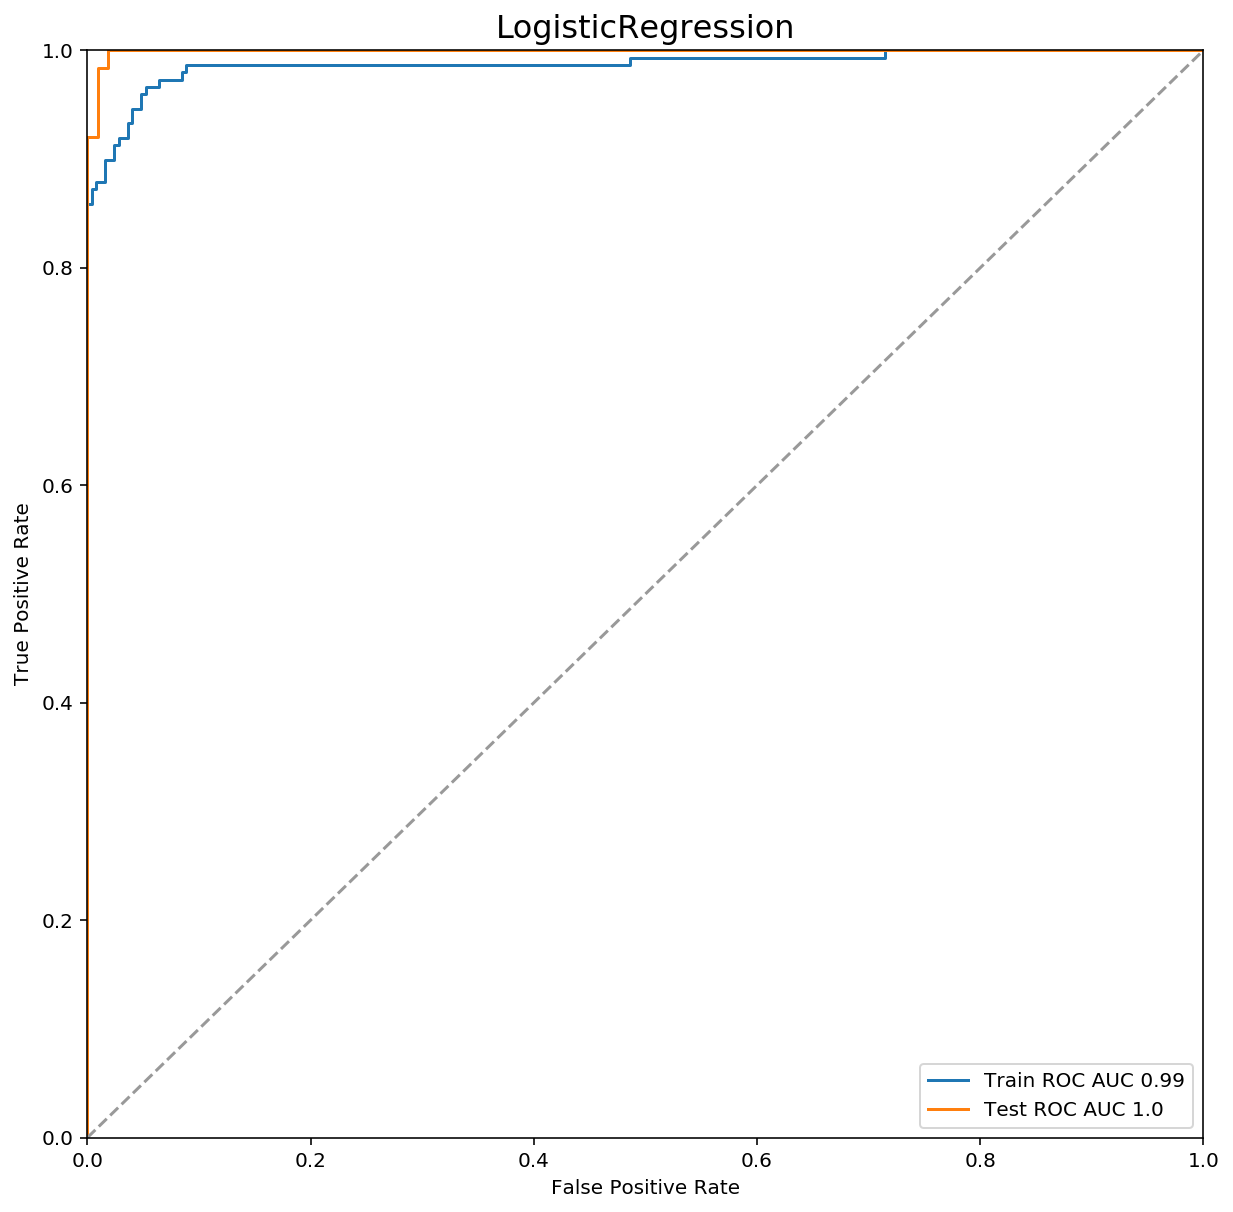

In [23]:
import matplotlib
#
fpr_train, tpr_train, thresholds_train = roc_curve(y1_train, y1_pred_logreg_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y1_test, y1_pred_logreg_test)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(df_mean_worst_roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(df_mean_worst_roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression', size=16)
plt.legend(loc='lower right')
plt.show()

In [24]:
# Модель RandomForest (логистическая регресия) для выборки mean_worst
df_mean_worst_clf = RandomForestClassifier() # выбираем тип модели (случайный лес)
df_mean_worst_clf.fit(X1_train, y1_train) # обучаем модель

y1_pred_clf_train = df_mean_worst_clf.predict_proba(X1_train)[:,1] # предсказание для train
y1_pred_clf_test = df_mean_worst_clf.predict_proba(X1_test)[:,1] # предсказание для test

df_mean_worst_roc_auc_train_2 = np.round(roc_auc_score(y1_train, y1_pred_clf_train), 2)
df_mean_worst_roc_auc_test_2 = np.round(roc_auc_score(y1_test, y1_pred_clf_test), 2)

print("Train: ", df_mean_worst_roc_auc_train_2)
print("Test: ", df_mean_worst_roc_auc_train_2)

Train:  1.0
Test:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


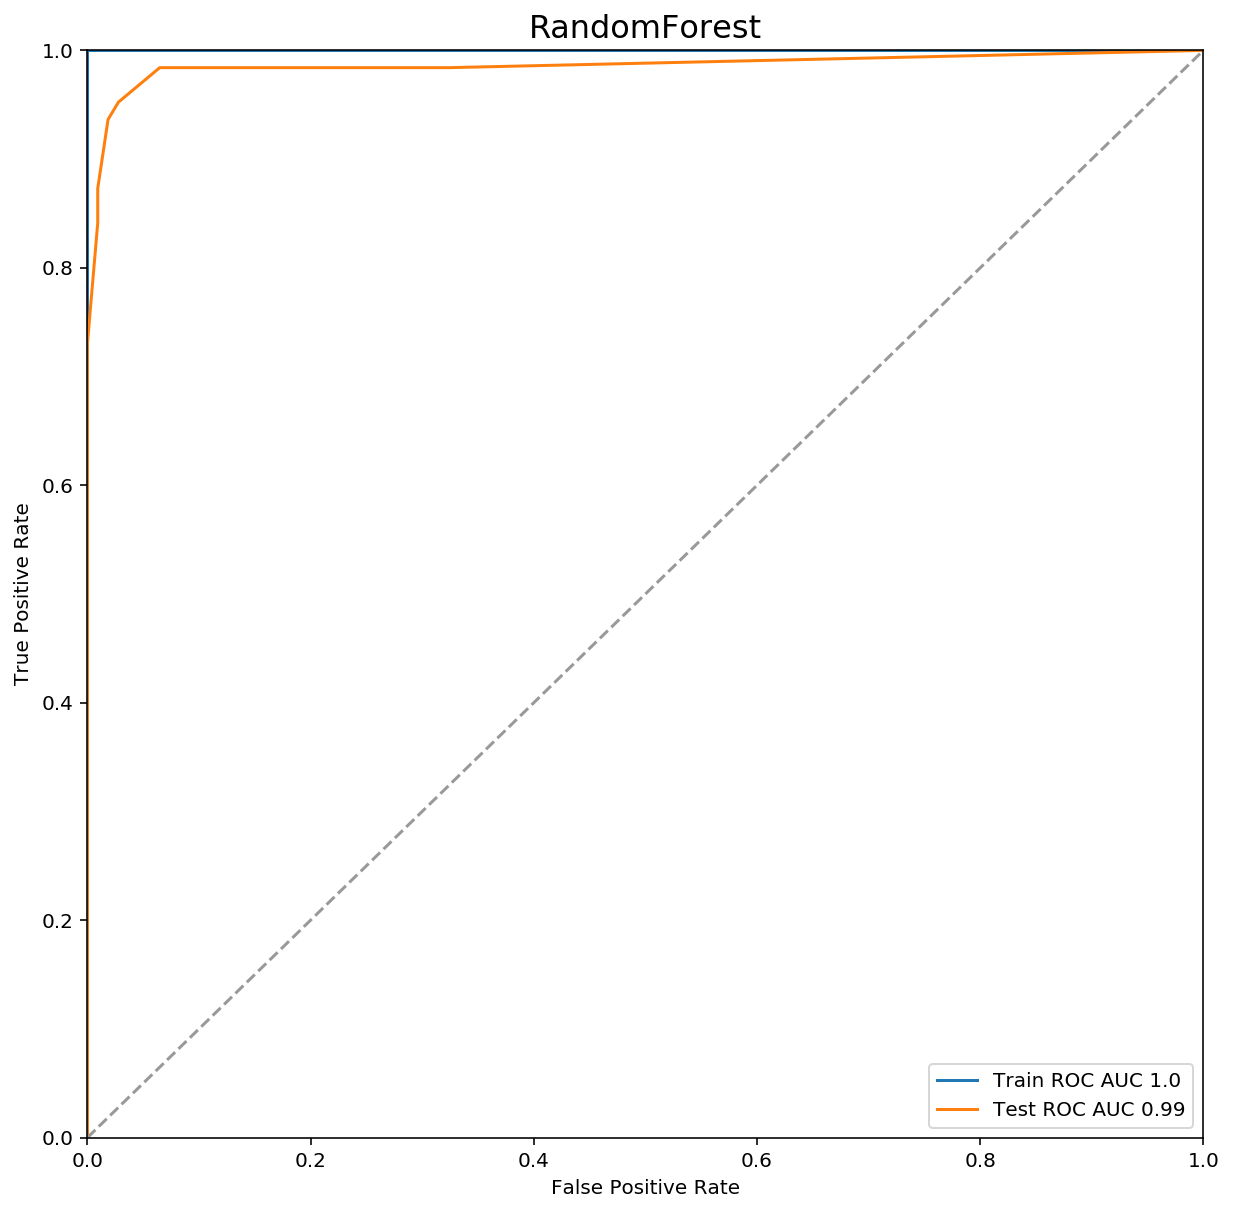

In [25]:
import matplotlib
#
fpr_train, tpr_train, thresholds_train = roc_curve(y1_train, y1_pred_clf_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y1_test, y1_pred_clf_test)

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(df_mean_worst_roc_auc_train_2))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(df_mean_worst_roc_auc_test_2))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest', size=16)
plt.legend(loc='lower right')
plt.show()

**Выводы:**
1. Показатели ROC AUC в обоих датасетах имеют высокие значения (>=99%)
2. Значения ROC-кривой в модели Логистической регрессии имеют более высокое значение в тренировочной выборке, по сравнению с тестовой (Train: 1.00; Test: 0.99).
3. Значения ROC-кривой в модели RandomForest имеют одинаковые значения как в тренировочной, так и в тестовой выборке (Train: 1.00; Test: 1.00).

### 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [26]:
# Модель LogisticRegression (логистическая регресия)
accuracy_log = accuracy_score(y1_test, y1_pred_logreg_test.round())
f1_score_log = f1_score(y1_test, y1_pred_logreg_test.round())
precision_score_log = precision_score(y1_test, y1_pred_logreg_test.round())
recall_score_log = recall_score(y1_test, y1_pred_logreg_test.round())

print(f'Accuracy: {accuracy_log:.2f}')
print(f'F1_score: {f1_score_log:.2f}')
print(f'Precision_score: {precision_score_log:.2f}')
print(f'Recall_score: {recall_score_log:.2f}')

Accuracy: 0.97
F1_score: 0.96
Precision_score: 0.98
Recall_score: 0.94


In [27]:
# Модель RandomForest (случайный лес)
accuracy_clf = accuracy_score(y1_test, y1_pred_clf_test.round())
f1_score_clf = f1_score(y1_test, y1_pred_clf_test.round())
precision_score_clf = precision_score(y1_test, y1_pred_clf_test.round())
recall_score_clf = recall_score(y1_test, y1_pred_clf_test.round())

print(f'Accuracy: {accuracy_clf:.2f}')
print(f'F1_score: {f1_score_clf:.2f}')
print(f'Precision_score: {precision_score_clf:.2f}')
print(f'Recall_score: {recall_score_clf:.2f}')

Accuracy: 0.96
F1_score: 0.95
Precision_score: 0.97
Recall_score: 0.94


**Выводы:**
1. Показатели по всем метрикам оценки качества имеют высокие значения (>=94%) в обеих моделях.
2. Обе модели имеют отличные, друг от друга, результаты по метрикам оценки качества Accuracy, F-мера, Precision_score и Recall_score. Значения большинства метрик оценки качества в модели LogisticRegression выше, чем в модели RandomForest, за исключением метрики Recall_score (которая имеет одинаковое значение в обеих моделях).

**Значения метрик (LogisticRegression / RandomForest) -**
Accuracy: 0.97 / 0.96; 
F1_score: 0.95 / 0.96; 
Precision_score: 0.98 / 0.97; 
Recall_score: 0.94 / 0.94

Таким образом, учитывая значения всех метрик оценки качества моделей более предпочтительным, с позиции решения задачи бинарной классификации, является выбор модели Логистической регрессии. Так как она показывевает более лучшие результаты оценки качества по всем критериям.

### 11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет

**Ссылка на репозиторий:** https://github.com/OleginV/DVP-3

**Название блокнота:** Итоговая работа (Feature Engineering).ipynb